## Process test results

In [2]:
import json

with open('call_on_min_options_test_results.json') as f:
    data = json.load(f)
    

{'test 0': {'params': [{'S': 2.0,
    'vol': 0.3,
    'r': 0.03,
    'T': 0.0821917808219178,
    'mu': 0.6919143038476165,
    'sigma': 0.08600732686214937,
    'mean': 2.004937591789559,
    'std': 0.1727587094262651,
    'low': 1.4866614635107638,
    'high': 2.5232137200683544},
   {'S': 2.0,
    'vol': 0.3,
    'r': 0.03,
    'T': 0.0821917808219178,
    'mu': 0.6919143038476165,
    'sigma': 0.08600732686214937,
    'mean': 2.004937591789559,
    'std': 0.1727587094262651,
    'low': 1.4866614635107638,
    'high': 2.5232137200683544}],
  'covariance': [[0.06814284358368233, -0.04691584020430224],
   [-0.04691584020430224, 0.033307908201619725]],
  'test_params': {'epsilon': 0.01, 'alpha': 0.01},
  'results': [[0.015777500933285647,
    0.015125798007450314,
    0.0087249299941395,
    0.021526666020761174,
    'True'],
   [0.015777500933285647,
    0.01709731005572077,
    0.010688957931396261,
    0.02350566218004528,
    'True'],
   [0.015777500933285647,
    0.012801143726289

In [3]:
data['test 0']['results']

[[0.015777500933285647,
  0.015125798007450314,
  0.0087249299941395,
  0.021526666020761174,
  'True'],
 [0.015777500933285647,
  0.01709731005572077,
  0.010688957931396261,
  0.02350566218004528,
  'True'],
 [0.015777500933285647,
  0.012801143726289361,
  0.006407936462538479,
  0.019194350990040243,
  'True']]

In [9]:
with open('vanilla_call_options-2024-02-13-20-57-12.json') as f:
    data1 = json.load(f)

with open('vanilla_call_options-2024-02-13-21-01-39.json') as f:
    data2 = json.load(f)

with open('vanilla_call_options-2024-02-13-21-04-42.json') as f:
    data3 = json.load(f)
    
with open('vanilla_call_options-2024-02-13-21-06-49.json') as f:
    data4 = json.load(f)
    
with open('vanilla_call_options-2024-02-13-21-08-16.json') as f:
    data5 = json.load(f)
    
with open('vanilla_call_options-2024-02-13-21-09-21.json') as f:
    data6 = json.load(f)
    
with open('vanilla_call_options-2024-02-13-21-10-18.json') as f:
    data7 = json.load(f)
    
with open('vanilla_call_options-2024-02-13-21-11-14.json') as f:
    data8 = json.load(f)
    
with open('vanilla_call_options-2024-02-13-21-12-07.json') as f:
    data9 = json.load(f)
    
with open('vanilla_call_options-2024-02-13-21-12-57.json') as f:
    data10 = json.load(f)
    
data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

In [15]:
import numpy as np
epsilon_range = np.linspace(0.001, 0.01, 10)
all_results = []

for i in range(10):
    curr_result = data[i]['test 0']['results']
    exact = curr_result[0][0]
    results_test = []
    for j in range(len(curr_result)):
        lower = curr_result[j][2]
        upper = curr_result[j][3]
        estimate = curr_result[j][1]
        error = abs(exact - estimate)
        oracle_calls = curr_result[j][5]
        results_test.append([error, oracle_calls])
        
    results_test = np.array(results_test)
    mean_error = np.mean(results_test[:,0])
    mean_oracle_calls = np.mean(results_test[:,1])
    all_results.append([mean_error, mean_oracle_calls])

all_results = np.array(all_results)

Text(0, 0.5, 'Mean error')

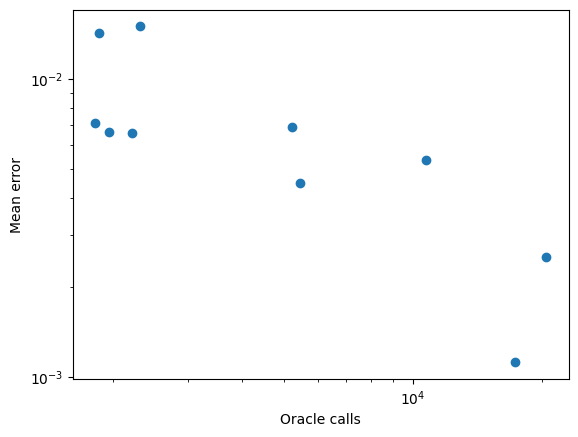

In [19]:
import matplotlib.pyplot as plt

plt.loglog(all_results[:,1], all_results[:,0], 'o')
plt.xlabel('Oracle calls')
plt.ylabel('Mean error')